In [17]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Excel File

In [19]:
#Reading the Dataset
xls = pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')

## Question 1. Calculate the time spent in ED Department for each visit.

In [20]:
df_EDV['time spent'] = df_EDV['EDDischargeTime'] - df_EDV['VisitDate']
# Print the result
df_EDV[['PatientID', 'time spent']]

,PatientID,time spent
0,1,0 days 11:20:22.924000
1,12,0 days 23:14:20.215000
2,13,0 days 01:50:56.151000
3,14,0 days 01:20:09.793000
4,15,0 days 02:38:20.043000
...,...,...
1194,929,0 days 15:53:09.453000
1195,932,0 days 22:27:04.030000
1196,933,0 days 04:30:03.545000
1197,934,0 days 06:10:35.054000


## Question 2. Get the  number of patients based on service and primary diagnosis.

In [21]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')
#checking the count of patients based on service and primary diagnosis
dfs = df_RE.groupby(['Service','PrimaryDiagnosis'])['AdmissionID'].count()
# to show
print(dfs)

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

## Question 3. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

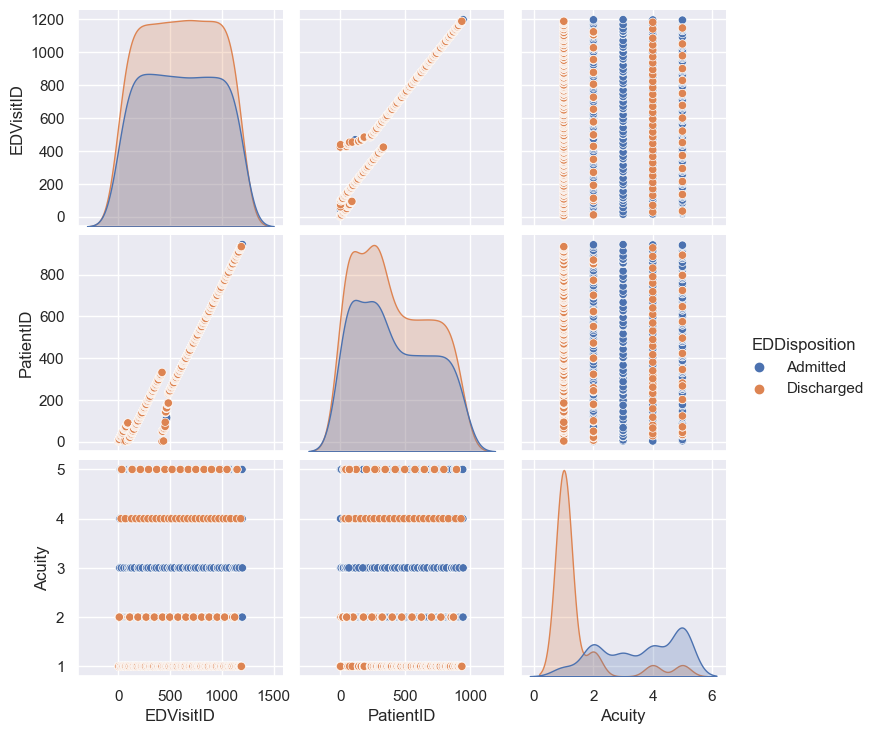

In [22]:
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
# creating a pairplot
sns.pairplot(df_EDV, hue ='EDDisposition')
# to show
plt.show()

## Question 4. Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  (Attach screenshots for this question)

In [24]:
from pandasql import sqldf 
import pandasql as ps
mysql = lambda q: sqldf(q, globals() )
df_Tnames  = ps.sqldf("select ProviderName from df_P where ProviderName like 'T%'")
df_Tnames

,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye


## Question 5. Create a bar chart between expectedLOS & Primary diagnosis.

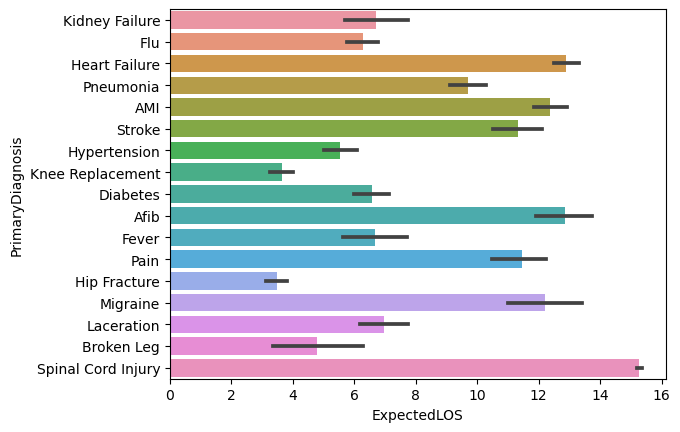

In [7]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')
# creating bar chart
sns.barplot(x = 'ExpectedLOS',y = 'PrimaryDiagnosis',data = df_RE)
# to show
plt.show()

## Question 6. Find the last name of the patients, by getting the first name from the user.

In [8]:
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
# taking the name of the patients as input
firstName = input('What is your first name?\n')
# to find the last names from the given first name
df_PA[df_PA.FirstName == firstName]['LastName'].tolist()

What is your first name?
Ted


['Scott', 'Stanley', 'Hue']

## Question 7. Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [68]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Validating the correct input fron user
while True:
    val = input("Enter Expected LOS: ")
    try:
        val = float(val)
    except:
        print('Please use the valid numeric numbers.')
        continue
    if val < 0:
        print('Please enter a positive number.')
        continue
    break


temp_df = df_D.loc[(df_D['ExpectedLOS']> float(val))] 
# printing the output
print("%s%s" % ('List Of Patients whose ExpectedLOS is greater than ' +str(val)+' day(s) is  : ',  len(temp_df.index)))

Enter Expected LOS: 10
List Of Patients whose ExpectedLOS is greater than 10.0 day(s) is  : 291


## Question 8. Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.

In [72]:
import pandas as pd
import datetime
import plotly.express as px

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

# Convert the ProviderDateOnStaff column to datetime format
df_P['ProviderDateOnStaff'] = pd.to_datetime(df_P['ProviderDateOnStaff'], format='%m/%d/%Y')

# Calculate the providers' experience in days
df_P['Experience'] = (datetime.datetime.now() - df_P['ProviderDateOnStaff']).dt.days

# Create a sunburst chart with providers' names by their provider specialty and experience
fig = px.sunburst(df_P, path=['ProviderSpecialty', 'ProviderName', 'Experience'], values='ProviderID')

# Show the chart
fig.show()


In [74]:
# we can see the new Experience column in the dataframe
df_P

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Experience
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,11062
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,10941
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,10888
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,10706
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,10323
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,10131
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,10008
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,9817
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,9551
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,9161


## Question 9. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

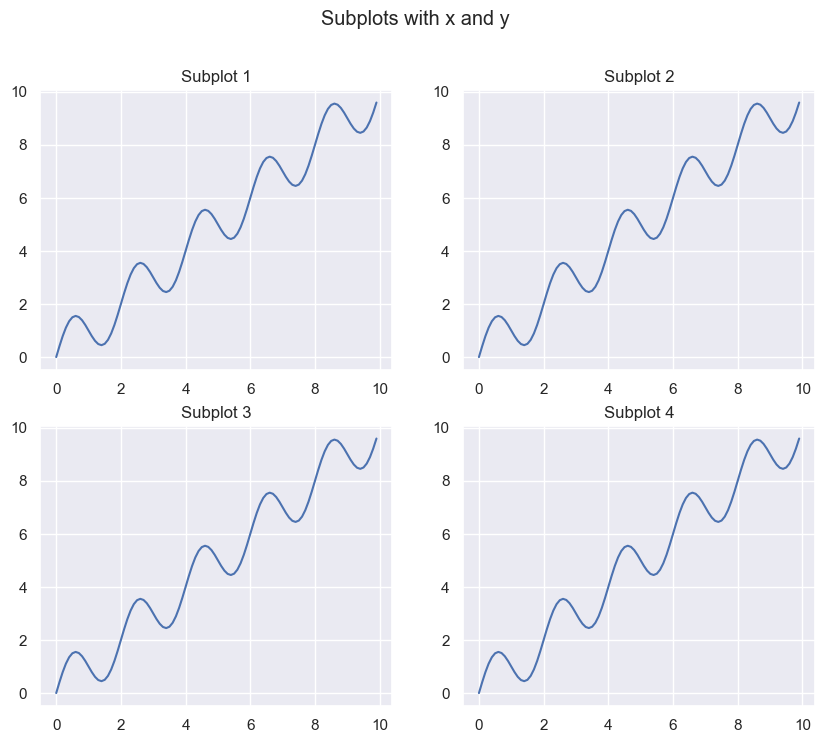

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y values
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Create figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot data in each subplot
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Subplot 1')
axs[0, 1].plot(x, y)
axs[0, 1].set_title('Subplot 2')
axs[1, 0].plot(x, y)
axs[1, 0].set_title('Subplot 3')
axs[1, 1].plot(x, y)
axs[1, 1].set_title('Subplot 4')

# Add overall title to the figure
fig.suptitle('Subplots with x and y')

# Display the plot
plt.show()



## Question 10. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [51]:
#Reading the EDVisits sheet
df = pd.read_excel(xls, 'EDVisits')

df = df.groupby(["ReasonForVisit","EDDisposition"]).size().reset_index(name='Total_Num_Patients')
print(df)

stack_df=df.stack(level=0)
print('STACKED OUTPUT IS')
print(stack_df)

unstack_df = stack_df.unstack().unstack().unstack()
print('UNSTACKED OUTPUT IS')
print(unstack_df)

         ReasonForVisit EDDisposition  Total_Num_Patients
0              Accident      Admitted                  39
1              Bleeding      Admitted                  16
2              Bleeding    Discharged                  15
3          Car Accident      Admitted                  17
4            Chest Pain      Admitted                  94
5            Chest Pain    Discharged                  15
6                 Cough    Discharged                   1
7                 Fever      Admitted                  46
8                 Fever    Discharged                 188
9              Gun Shot      Admitted                  16
10         Intoxication    Discharged                  30
11           Laceration    Discharged                  30
12             Migraine      Admitted                  47
13             Migraine    Discharged                 109
14            Pneumonia      Admitted                 136
15            Pneumonia    Discharged                  65
16  Shortness 

## Question 11. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [10]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

# Create a new dataframe with the discharge time as values
discharge_data = pd.DataFrame(df_RE['DischargeDate'])

# Extract the date and time from the discharge time and create separate columns for them
discharge_data['Date'] = discharge_data['DischargeDate'].dt.date
discharge_data['Time'] = discharge_data['DischargeDate'].dt.time

# Print the result
print(discharge_data[['Date', 'Time']])


           Date             Time
0    2018-01-04  19:59:31.391000
1    2018-01-04  21:28:51.898000
2    2018-01-04  22:28:23.672000
3    2018-01-05  05:47:04.933000
4    2018-01-05  14:18:30.029000
..          ...              ...
715  2018-03-07  21:22:10.061000
716  2018-03-08  02:43:18.749000
717  2018-03-08  09:27:18.377000
718  2018-03-10  06:06:12.068000
719  2018-03-10  20:38:30.568000

[720 rows x 2 columns]


## Question 12. Create a visualization on the count of patients based on primary diagnosis.

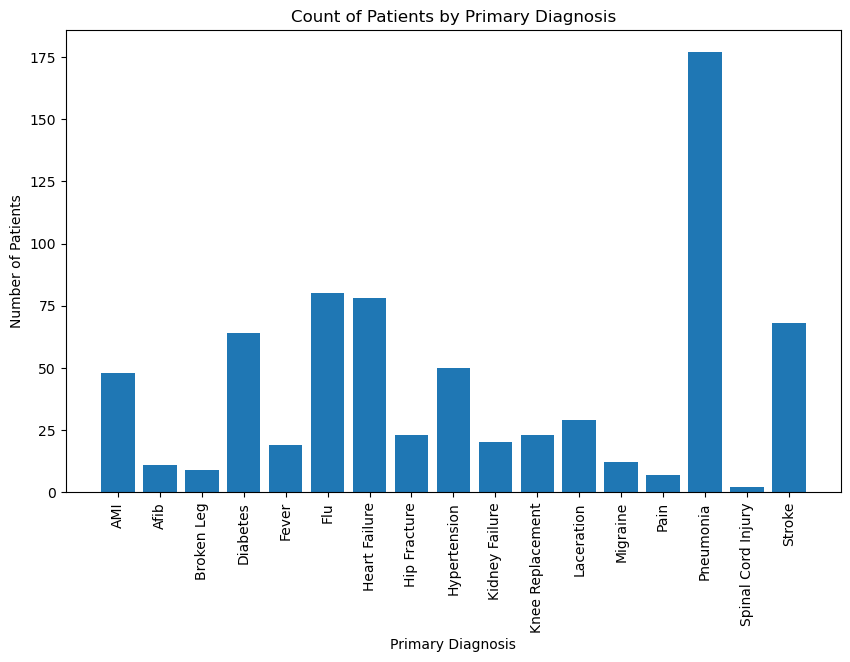

In [11]:
diagnosis_counts = df_RE.groupby('PrimaryDiagnosis')['PatientID'].count()

# Create a bar plot of the diagnosis counts
plt.figure(figsize=(10, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Primary Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Count of Patients by Primary Diagnosis')
plt.show()

## Question 13. Create a bar chart on service & expected length of stay.

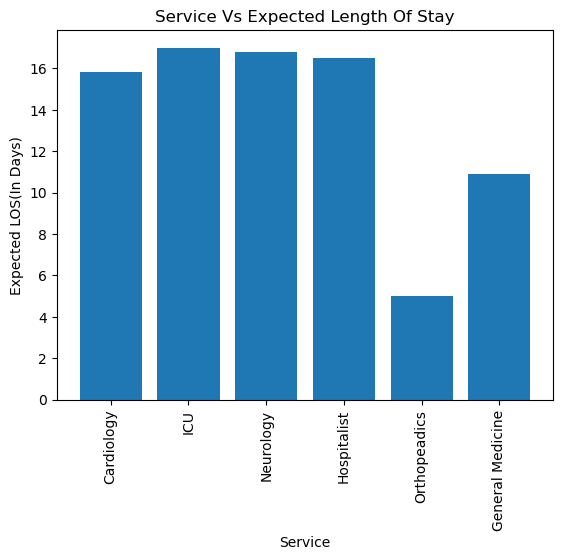

In [12]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')


plt.bar(df_D['Service'], df_D['ExpectedLOS'])
plt.title('Service Vs Expected Length Of Stay')
plt.xlabel('Service')
plt.xticks(rotation=90)
plt.ylabel('Expected LOS(In Days)')

plt.show()

## Question 14. Find the count of Spanish Speaking patients.

In [13]:
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

# Filter the data to include only Spanish speaking patients
spanish_speaking = df_PA.loc[df_PA['Language'] == 'Spanish']

# Get the count of Spanish speaking patients
count_spanish_speaking = spanish_speaking['PatientID'].nunique()

# Print the result
print('Number of Spanish speaking patients:', count_spanish_speaking)


Number of Spanish speaking patients: 110


## Question 15. Create a boxplot on ExpectedLOS by taking service into account.

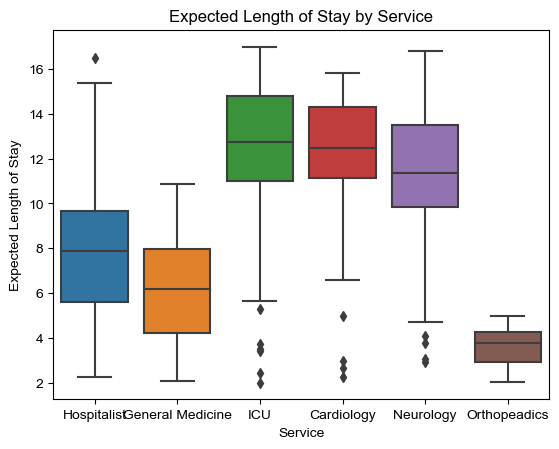

In [14]:
#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

# Create a boxplot of ExpectedLOS by Service
sns.boxplot(x='Service', y='ExpectedLOS', data=df_RE)
sns.set(rc={'figure.figsize':(8,8)})
plt.title('Expected Length of Stay by Service')
plt.xlabel('Service')
plt.ylabel('Expected Length of Stay')
plt.show()

## Question 16. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [52]:
df_P['Number of Specialty']=1
df_P.groupby([ 'ProviderSpecialty'])['Number of Specialty'].count().reset_index()

,ProviderSpecialty,Number of Specialty
0,Cardiology,8
1,Pediatrics,9
2,PrimaryCare,16
3,Surgery,7


## Question 17. Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)

In [50]:
ps.sqldf("select strftime('%Y', DateofVisit) As VisitRecordsYear from df_AV")

,VisitRecordsYear
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
945,2019
946,2019
947,2019
948,2019


## Question 18. Display using a donut chart the patient count in the ReAdmissionRegistry.

## Question 19. Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos.

In [85]:
import pandas as pd

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

# Calculate the difference between the max and min ExpectedLos
diff_expected_los = df_RE['ExpectedLOS'].max() - df_RE['ExpectedLOS'].min()

# Filter the dataframe to show the records where ExpectedLOS is greater than the difference
filtered_df = df_RE[df_RE['ExpectedLOS'] > diff_expected_los]

# Print the filtered dataframe
print(filtered_df)


     AdmissionID  PatientID AdmissionDate           DischargeDate  \
6            549          8    2018-01-01 2018-01-07 15:39:25.987   
18           252         19    2018-01-01 2018-01-17 14:13:23.627   
31           550         27    2018-01-02 2018-01-13 07:34:46.603   
46           391         41    2018-01-03 2018-01-10 00:57:05.440   
64           609         59    2018-01-04 2018-01-09 01:18:34.182   
88           144         83    2018-01-05 2018-01-17 11:00:10.366   
95           145         90    2018-01-06 2018-01-15 03:16:35.614   
100          444         95    2018-01-06 2018-01-19 02:57:34.514   
113          445        108    2018-01-07 2018-01-22 06:49:20.132   
118          114        113    2018-01-08 2018-01-14 22:04:11.532   
140          398        134    2018-01-10 2018-01-15 16:43:47.026   
144           10        139    2018-01-10 2018-01-23 02:52:59.927   
182          368        178    2018-01-14 2018-01-18 13:44:53.072   
197           68        194    201

## Question 20. Using a bar chart, which Service had the lowest count of Expected Mortality?

Service with the lowest count of Expected Mortality: Orthopeadics


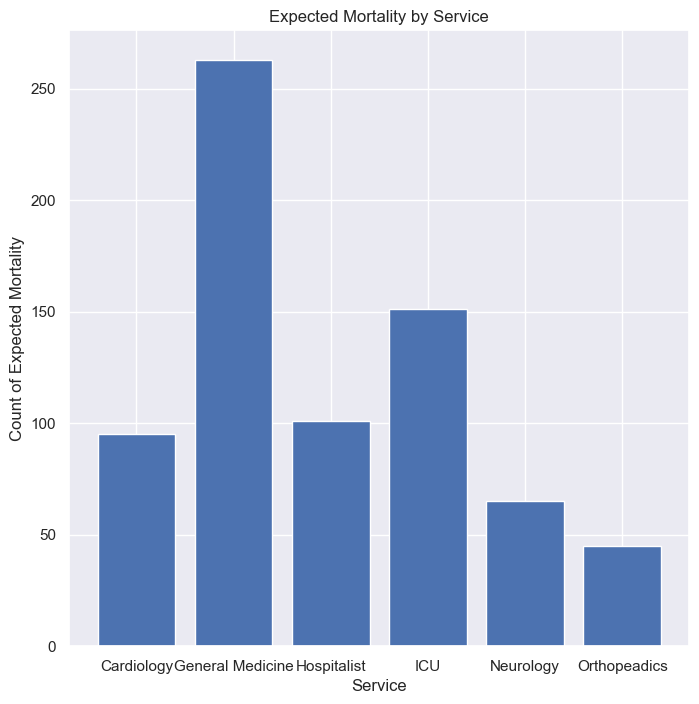

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

# group by Service and calculate the count of Expected Mortality
df_mortality = df_D.groupby('Service')['ExpectedMortality'].count().reset_index(name='count')

# create a bar chart
fig, ax = plt.subplots()
ax.bar(df_mortality['Service'], df_mortality['count'])
ax.set_xlabel('Service')
ax.set_ylabel('Count of Expected Mortality')
ax.set_title('Expected Mortality by Service')

# find the Service with the lowest count
lowest_service = df_mortality.loc[df_mortality['count'].idxmin(), 'Service']
print("Service with the lowest count of Expected Mortality:", lowest_service)

plt.show()
